## Unsupervised Learning

A quick intro and overview of models [here](https://machinelearningmastery.com/clustering-algorithms-with-python/).

- What is Unsupervised Learning? Most of the time, when we discuss Machine Learning, we talk about Supervised Learning: trying to predict a target variable. Linear and logistic regression, Decision Trees, Random Forests and Boosting methods... they all need a target variable to operate. When we don't have a target variable, we are in the domain of Unsupervised Learning.

    - If we're not predicting a target variable, what are we doing? We can try to understand the relationships between the features or between the observations in our dataset - discover, perhaps underlying patterns and multivariate relationships that go beyond what humans can spot doing a basic Exploratory Data Analysis.

    - It's called Unsupervised learning because we do not have a clear way to tell whether the algorithm is doing well or not - in SL, predictions can be compared with true values (labels) - here there are no performance metrics with which to supervise the task.

- Clustering: The most popular task in UL is Clustering. It's popular in the business world because companies usually have big unlabeled datasets of customers.They need to segment those customers in order to make effective decisions like: understanding their behavior, sending targeted emails, offering loyalty promotions, tailoring new products, etc. Clustering algorithms find observations with similarities and group themselves.

- Clustering vs. traditional segmentation: Traditionally, subject experts were the ones creating the segmentation: maybe they had some data showing that, in general, customers under and over 25 years old behave differently, and that gender is a clear divide when it comes to shopping. Rich datasets and clustering algorithms can challenge these traditional segmentation. If an e-commerce site has click-through rates in multiple stages of the marketing funnel, email-opening rates and a history of products searched, added to a wish list and purchased (each divided in a few variables by category of product), it's much more difficult to use "instinct" or a couple of bar charts to segment the customers. However, clustering algorithms can find groups of customers that are similar based on these behavioral variables.

### KMEANS

In [1]:
import pandas as pd
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
# y = pd.Series(data["target"])

X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
len(X)

178

In [21]:
# y.unique()

array([0, 1, 2])

In [ ]:
[2, 1, 0]

In [2]:
# K-Means is a distance based algorithm: we need to scale / normalize:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

pd.DataFrame(X_prep).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Clustering:

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=42)

In [4]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [5]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    51
1    62
2    65
dtype: int64

In our original dataset we have 'white wine' assigned to 0, but in our clustering algorithm 'white wine' got assigned to 1. So, we need to make these clusters correclty represented.

In [7]:
# Explore the cluster assignment in the original dataset
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

X_df['cluster'] = X_df['cluster'].apply(lambda x: 0 if x == 1 else 1 if x == 2 else 2)
X_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
# "performance metric"
kmeans.inertia_

1277.928488844643

### Choosing the best K
#### Inertia

Calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

In [19]:
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=1, n_init=1)
kmeans.fit(X_prep)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 2350.5325403188845
Iteration 1, inertia 1578.2871132862415
Iteration 2, inertia 1461.6729976641755
Iteration 3, inertia 1332.1956009234677
Iteration 4, inertia 1294.733454853178
Iteration 5, inertia 1286.5541533173287
Iteration 6, inertia 1282.9757146734742
Iteration 7, inertia 1282.4635183465314
Converged at iteration 7: strict convergence.


1282.4635183465314

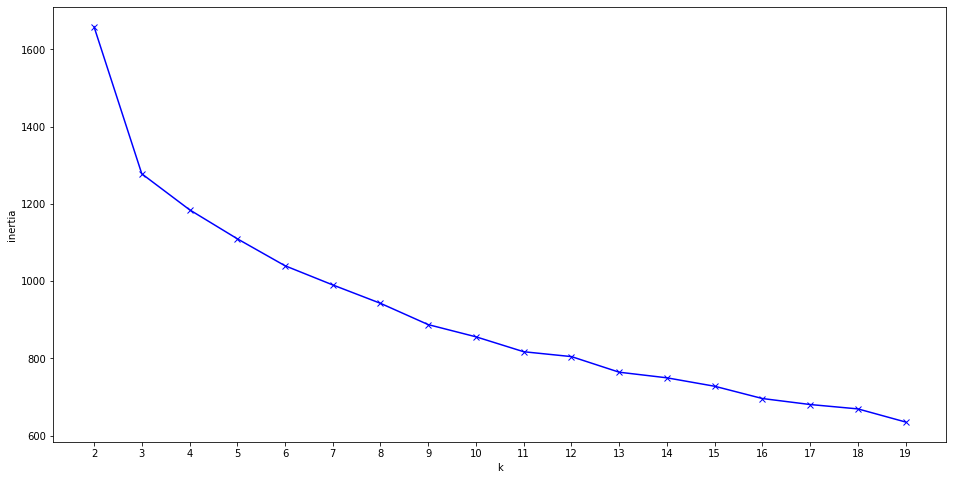

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

Inertia is the metric that Scikit-Learn optimizes, related to how much the centroids of each cluster are moving. But, it does not have a limited range and that makes it difficult to evaluate.

#### Silhouette Score
Calculated using the mean distance of the points and it's centroid and the mean nearest-cluster distance for each sample. Measures the average of how similar each point is to its cluster.

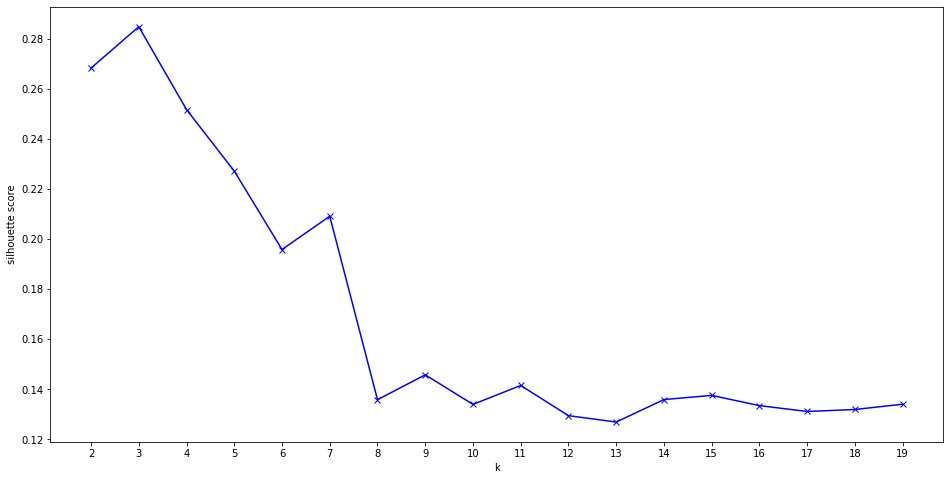

In [18]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y, X_df['cluster']))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        59
           1       1.00      0.92      0.96        71
           2       0.94      1.00      0.97        48

    accuracy                           0.97       178
   macro avg       0.96      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178

